In [ ]:
# 월별 상세 통계 및 특이사항 분석
print("=== 월별 분석 결과 요약 ===")
print(f"분석 기간: {monthly_stats['년월_str'].iloc[0]} ~ {monthly_stats['년월_str'].iloc[-1]}")

# 가장 이용량이 많았던 월과 적었던 월
max_month_idx = monthly_stats['총_이용건수'].idxmax()
min_month_idx = monthly_stats['총_이용건수'].idxmin()

print(f"🔥 가장 활발했던 월: {monthly_stats.iloc[max_month_idx]['년월_str']} ({monthly_stats.iloc[max_month_idx]['총_이용건수']:,}건)")
print(f"❄️ 가장 저조했던 월: {monthly_stats.iloc[min_month_idx]['년월_str']} ({monthly_stats.iloc[min_month_idx]['총_이용건수']:,}건)")

# 최대 증가율과 최대 감소율
if len(monthly_stats) > 1:
    max_increase_idx = monthly_stats['총이용_증감률'].idxmax()
    max_decrease_idx = monthly_stats['총이용_증감률'].idxmin()
    
    if not pd.isna(monthly_stats.iloc[max_increase_idx]['총이용_증감률']):
        print(f"📈 최대 증가: {monthly_stats.iloc[max_increase_idx]['년월_str']} ({monthly_stats.iloc[max_increase_idx]['총이용_증감률']:+.1f}%)")
    
    if not pd.isna(monthly_stats.iloc[max_decrease_idx]['총이용_증감률']):
        print(f"📉 최대 감소: {monthly_stats.iloc[max_decrease_idx]['년월_str']} ({monthly_stats.iloc[max_decrease_idx]['총이용_증감률']:+.1f}%)")

# 전체 기간 평균 월별 이용량
avg_monthly_usage = monthly_stats['총_이용건수'].mean()
print(f"📊 월평균 이용건수: {avg_monthly_usage:,.0f}건")

# 계절별 특성 (7-9월: 여름, 10-12월: 가을~겨울)
summer_months = monthly_stats[monthly_stats['년월'].astype(str).str.contains('2024-0[789]')]
winter_months = monthly_stats[monthly_stats['년월'].astype(str).str.contains('2024-(10|11|12)')]

if len(summer_months) > 0:
    summer_avg = summer_months['총_이용건수'].mean()
    print(f"🌞 여름 평균 (7-9월): {summer_avg:,.0f}건")

if len(winter_months) > 0:
    winter_avg = winter_months['총_이용건수'].mean()
    print(f"❄️ 가을~겨울 평균 (10-12월): {winter_avg:,.0f}건")
    
    if len(summer_months) > 0:
        seasonal_diff = ((winter_avg - summer_avg) / summer_avg) * 100
        print(f"🌡️ 계절별 변화: {seasonal_diff:+.1f}% (여름 대비 가을~겨울)")

print("\\n=== 월별 트렌드 해석 ===")
# 트렌드 해석
total_change = ((monthly_stats.iloc[-1]['총_이용건수'] - monthly_stats.iloc[0]['총_이용건수']) / monthly_stats.iloc[0]['총_이용건수']) * 100

if total_change > 0:
    print(f"📈 전체적으로 증가 추세: {total_change:+.1f}% (첫 달 대비 마지막 달)")
else:
    print(f"📉 전체적으로 감소 추세: {total_change:+.1f}% (첫 달 대비 마지막 달)")

# 변동성 분석
volatility = monthly_stats['총이용_증감률'].std()
if not pd.isna(volatility):
    print(f"📊 월별 변동성 (표준편차): {volatility:.1f}%")


=== 월별 분석 결과 요약 ===


NameError: name 'monthly_stats' is not defined

In [ ]:
# 월별 인기 장소 TOP 5 변화
print("=== 월별 인기 대여소 TOP 5 변화 ===")

for month in sorted(df['년월'].unique()):
    month_data = df[df['년월'] == month]
    month_top5 = month_data.groupby('대여소명')['대여건수'].sum().nlargest(5)
    
    print(f"\\n📅 {month} TOP 5 대여소:")
    for i, (station, count) in enumerate(month_top5.items(), 1):
        station_short = station[:30] + '...' if len(station) > 30 else station
        print(f"  {i}. {station_short}: {count:,}건")


In [ ]:
# 월별 트렌드 시각화
plt.figure(figsize=(15, 10))

# 1. 월별 이용건수 추이
plt.subplot(2, 2, 1)
plt.plot(monthly_stats['년월_str'], monthly_stats['대여건수'], marker='o', linewidth=2, label='대여건수', color='skyblue')
plt.plot(monthly_stats['년월_str'], monthly_stats['반납건수'], marker='s', linewidth=2, label='반납건수', color='lightcoral')
plt.plot(monthly_stats['년월_str'], monthly_stats['총_이용건수'], marker='^', linewidth=2, label='총 이용건수', color='green')
plt.title('월별 외국인 따릉이 이용 추이', fontsize=14, fontweight='bold')
plt.ylabel('이용건수')
plt.xlabel('월')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 값 표시
for i, row in monthly_stats.iterrows():
    plt.text(i, row['총_이용건수'] + 50, f"{row['총_이용건수']:,}", ha='center', fontsize=9)

# 2. 월별 증감률
plt.subplot(2, 2, 2)
months_with_change = monthly_stats[1:]['년월_str'].tolist()
rental_changes = monthly_stats[1:]['대여_증감률'].tolist()
return_changes = monthly_stats[1:]['반납_증감률'].tolist()

x = range(len(months_with_change))
width = 0.35

plt.bar([i - width/2 for i in x], rental_changes, width, label='대여 증감률', color='skyblue', alpha=0.7)
plt.bar([i + width/2 for i in x], return_changes, width, label='반납 증감률', color='lightcoral', alpha=0.7)
plt.title('월별 증감률 (전월 대비)', fontsize=14, fontweight='bold')
plt.ylabel('증감률 (%)')
plt.xlabel('월')
plt.legend()
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(x, months_with_change, rotation=45)
plt.grid(True, alpha=0.3)

# 값 표시
for i, (rental, return_val) in enumerate(zip(rental_changes, return_changes)):
    plt.text(i - width/2, rental + 1, f"{rental:+.1f}%", ha='center', fontsize=8)
    plt.text(i + width/2, return_val + 1, f"{return_val:+.1f}%", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# 월별 데이터 추출 및 분석
df['년월'] = df['일시'].dt.to_period('M')
df['월'] = df['일시'].dt.month

# 월별 집계
monthly_stats = df.groupby('년월').agg({
    '대여건수': 'sum',
    '반납건수': 'sum'
}).reset_index()

monthly_stats['총_이용건수'] = monthly_stats['대여건수'] + monthly_stats['반납건수']
monthly_stats['년월_str'] = monthly_stats['년월'].astype(str)

print("=== 월별 외국인 따릉이 이용 현황 ===")
print(monthly_stats)

# 월별 증감률 계산
monthly_stats['대여_증감률'] = monthly_stats['대여건수'].pct_change() * 100
monthly_stats['반납_증감률'] = monthly_stats['반납건수'].pct_change() * 100
monthly_stats['총이용_증감률'] = monthly_stats['총_이용건수'].pct_change() * 100

print("\\n=== 월별 증감률 (전월 대비) ===")
for idx, row in monthly_stats.iterrows():
    if idx == 0:
        print(f"{row['년월_str']}: 기준월 (대여: {row['대여건수']:,}, 반납: {row['반납건수']:,}, 총: {row['총_이용건수']:,})")
    else:
        print(f"{row['년월_str']}: 대여 {row['대여_증감률']:+.1f}%, 반납 {row['반납_증감률']:+.1f}%, 총이용 {row['총이용_증감률']:+.1f}%")


# 월별 증감 분석
## 외국인 따릉이 이용량의 월별 변화 추이 및 증감률 분석

# 외국인 따릉이 이용 장소별 분석
## 분석 목표: 외국인들이 가장 많이 대여/반납하는 장소 파악

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# 데이터 로드 (cp949 인코딩 사용)
file_path = '서울특별시 공공자전거 외국인 대여정보(일별)_24.7-12.csv'

try:
    df = pd.read_csv(file_path, encoding='cp949')
    print(f"성공적으로 데이터를 불러왔습니다.")
    print(f"데이터 크기: {df.shape}")
    print(f"컬럼명: {df.columns.tolist()}")
except Exception as e:
    print(f"데이터 로드 실패: {e}")


성공적으로 데이터를 불러왔습니다.
데이터 크기: (28116, 4)
컬럼명: ['일시', '대여소명', '대여건수', '반납건수']


In [ ]:
# 데이터 기본 정보 확인
print("=== 데이터 기본 정보 ===")
print(df.info())
print("\n=== 첫 5행 ===")
print(df.head())
print("\n=== 결측값 확인 ===")
print(df.isnull().sum())


=== 데이터 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28116 entries, 0 to 28115
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일시      28116 non-null  object
 1   대여소명    28116 non-null  object
 2   대여건수    28116 non-null  int64 
 3   반납건수    28116 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 878.8+ KB
None

=== 첫 5행 ===
           일시                     대여소명  대여건수  반납건수
0  2024-07-01             108. 서교동 사거리     1     0
1  2024-07-01      505. 자양사거리 광진아크로텔 앞     0     1
2  2024-07-01  1153. 발산역 1번, 9번 인근 대여소     1     0
3  2024-07-01   510. 뚝도아리수정수센터 버스정류소 옆     3     2
4  2024-07-01        511. 서울숲역 5번 출구 옆     1     3

=== 결측값 확인 ===
일시      0
대여소명    0
대여건수    0
반납건수    0
dtype: int64


In [ ]:
# 컬럼명 정리
df.columns = ['일시', '대여소명', '대여건수', '반납건수']
print("컬럼명 정리 완료:", df.columns.tolist())

# 데이터 타입 변환
df['일시'] = pd.to_datetime(df['일시'])
df['대여건수'] = pd.to_numeric(df['대여건수'], errors='coerce').fillna(0)
df['반납건수'] = pd.to_numeric(df['반납건수'], errors='coerce').fillna(0)

print("\n데이터 전처리 완료:")
print(df.head())


컬럼명 정리 완료: ['일시', '대여소명', '대여건수', '반납건수']

데이터 전처리 완료:
          일시                     대여소명  대여건수  반납건수
0 2024-07-01             108. 서교동 사거리     1     0
1 2024-07-01      505. 자양사거리 광진아크로텔 앞     0     1
2 2024-07-01  1153. 발산역 1번, 9번 인근 대여소     1     0
3 2024-07-01   510. 뚝도아리수정수센터 버스정류소 옆     3     2
4 2024-07-01        511. 서울숲역 5번 출구 옆     1     3


In [ ]:
# 1. 대여소별 총 대여건수 분석
rental_by_station = df.groupby('대여소명')['대여건수'].sum().sort_values(ascending=False)

print("=== 외국인 대여 TOP 20 장소 ===")
top_20_rental = rental_by_station.head(20)
for i, (station, count) in enumerate(top_20_rental.items(), 1):
    print(f"{i:2d}. {station}: {count:,}건")

print(f"\n총 대여소 수: {len(rental_by_station)}개")
print(f"전체 대여건수: {rental_by_station.sum():,}건")


=== 외국인 대여 TOP 20 장소 ===
 1. 207. 여의나루역 1번출구 앞: 854건
 2. 4217. 한강공원 망원나들목: 516건
 3. 3515. 서울숲 관리사무소: 454건
 4. 502. 자양(뚝섬한강공원)역 1번출구 앞: 402건
 5. 474.동대문역사문화공원역 1번출구 뒤편: 306건
 6. 2217.아크로리버뷰 부지 앞: 268건
 7. 2525.반포쇼핑타운 2동 앞: 251건
 8. 825. 서빙고동 주민센터 앞: 248건
 9. 3552.서울숲 공영주차장앞: 222건
10. 4765. 동대문디자인플라자: 217건
11. 565. 옥수역 3번출구: 217건
12. 249. 여의도중학교 옆: 207건
13. 302. 경복궁역 6번출구 뒤: 190건
14. 5870. LG트윈타워 앞: 186건
15. 1210. 롯데월드타워(잠실역2번출구 쪽): 182건
16. 870.노들섬 서측 앞: 175건
17. 475.DDP 패션몰: 173건
18. 4244. 당인리발전소 공원 앞: 172건
19. 3559.성동구민종합체육센터 앞: 163건
20. 3010.홍대입구역 3번출구: 158건

총 대여소 수: 2102개
전체 대여건수: 31,776건


In [ ]:
# 2. 대여소별 총 반납건수 분석
return_by_station = df.groupby('대여소명')['반납건수'].sum().sort_values(ascending=False)

print("=== 외국인 반납 TOP 20 장소 ===")
top_20_return = return_by_station.head(20)
for i, (station, count) in enumerate(top_20_return.items(), 1):
    print(f"{i:2d}. {station}: {count:,}건")

print(f"\n전체 반납건수: {return_by_station.sum():,}건")


=== 외국인 반납 TOP 20 장소 ===
 1. 207. 여의나루역 1번출구 앞: 732건
 2. 2217.아크로리버뷰 부지 앞: 459건
 3. 502. 자양(뚝섬한강공원)역 1번출구 앞: 450건
 4. 4217. 한강공원 망원나들목: 440건
 5. 2525.반포쇼핑타운 2동 앞: 420건
 6. 3515. 서울숲 관리사무소: 364건
 7. 825. 서빙고동 주민센터 앞: 337건
 8. 4791. 명동역9번 출구: 265건
 9. 474.동대문역사문화공원역 1번출구 뒤편: 232건
10. 4765. 동대문디자인플라자: 222건
11. 870.노들섬 서측 앞: 202건
12. 249. 여의도중학교 옆: 197건
13. 565. 옥수역 3번출구: 194건
14. 272. 당산육갑문: 194건
15. 106. 합정역 7번출구 앞: 191건
16. 302. 경복궁역 6번출구 뒤: 187건
17. 3010.홍대입구역 3번출구: 184건
18. 3552.서울숲 공영주차장앞: 172건
19. 5870. LG트윈타워 앞: 171건
20. 2219. 고속터미널역 8-1번, 8-2번 출구 사이: 160건

전체 반납건수: 31,265건


In [ ]:
# 3. 대여+반납 총합으로 가장 활발한 장소 분석
total_activity = df.groupby('대여소명').agg({
    '대여건수': 'sum',
    '반납건수': 'sum'
})
total_activity['총_이용건수'] = total_activity['대여건수'] + total_activity['반납건수']
total_activity = total_activity.sort_values('총_이용건수', ascending=False)

print("=== 외국인이 가장 활발하게 이용하는 TOP 20 장소 ===")
top_20_total = total_activity.head(20)
for i, (station, row) in enumerate(top_20_total.iterrows(), 1):
    print(f"{i:2d}. {station}")
    print(f"    총 이용: {row['총_이용건수']:,}건 (대여: {row['대여건수']:,}, 반납: {row['반납건수']:,})")


=== 외국인이 가장 활발하게 이용하는 TOP 20 장소 ===
 1. 207. 여의나루역 1번출구 앞
    총 이용: 1,586건 (대여: 854, 반납: 732)
 2. 4217. 한강공원 망원나들목
    총 이용: 956건 (대여: 516, 반납: 440)
 3. 502. 자양(뚝섬한강공원)역 1번출구 앞
    총 이용: 852건 (대여: 402, 반납: 450)
 4. 3515. 서울숲 관리사무소
    총 이용: 818건 (대여: 454, 반납: 364)
 5. 2217.아크로리버뷰 부지 앞
    총 이용: 727건 (대여: 268, 반납: 459)
 6. 2525.반포쇼핑타운 2동 앞
    총 이용: 671건 (대여: 251, 반납: 420)
 7. 825. 서빙고동 주민센터 앞
    총 이용: 585건 (대여: 248, 반납: 337)
 8. 474.동대문역사문화공원역 1번출구 뒤편
    총 이용: 538건 (대여: 306, 반납: 232)
 9. 4765. 동대문디자인플라자
    총 이용: 439건 (대여: 217, 반납: 222)
10. 565. 옥수역 3번출구
    총 이용: 411건 (대여: 217, 반납: 194)
11. 249. 여의도중학교 옆
    총 이용: 404건 (대여: 207, 반납: 197)
12. 4791. 명동역9번 출구
    총 이용: 399건 (대여: 134, 반납: 265)
13. 3552.서울숲 공영주차장앞
    총 이용: 394건 (대여: 222, 반납: 172)
14. 302. 경복궁역 6번출구 뒤
    총 이용: 377건 (대여: 190, 반납: 187)
15. 870.노들섬 서측 앞
    총 이용: 377건 (대여: 175, 반납: 202)
16. 5870. LG트윈타워 앞
    총 이용: 357건 (대여: 186, 반납: 171)
17. 3010.홍대입구역 3번출구
    총 이용: 342건 (대여: 158, 반납: 184)
18. 272. 당산육갑문
    총 이용: 320건 (

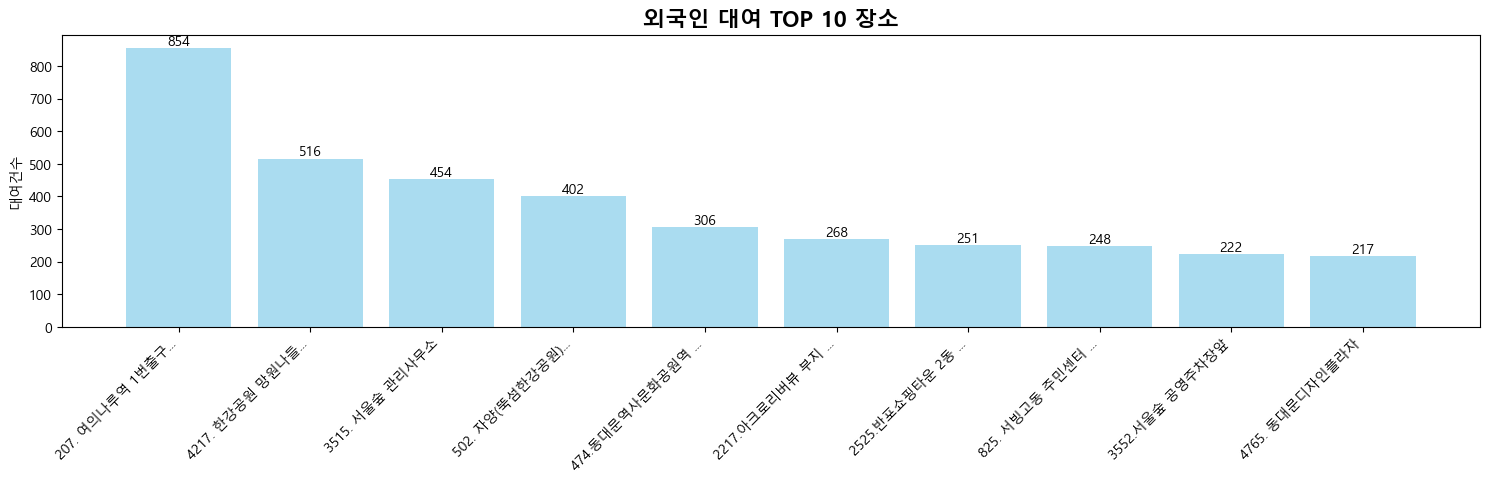

In [ ]:
# 4. 대여 TOP 10 시각화
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
top_10_rental = rental_by_station.head(10)
bars1 = plt.bar(range(len(top_10_rental)), top_10_rental.values, color='skyblue', alpha=0.7)
plt.title('외국인 대여 TOP 10 장소', fontsize=16, fontweight='bold')
plt.ylabel('대여건수')
plt.xticks(range(len(top_10_rental)), [s[:15] + '...' if len(s) > 15 else s for s in top_10_rental.index], 
           rotation=45, ha='right')

# 막대 위에 수치 표시
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


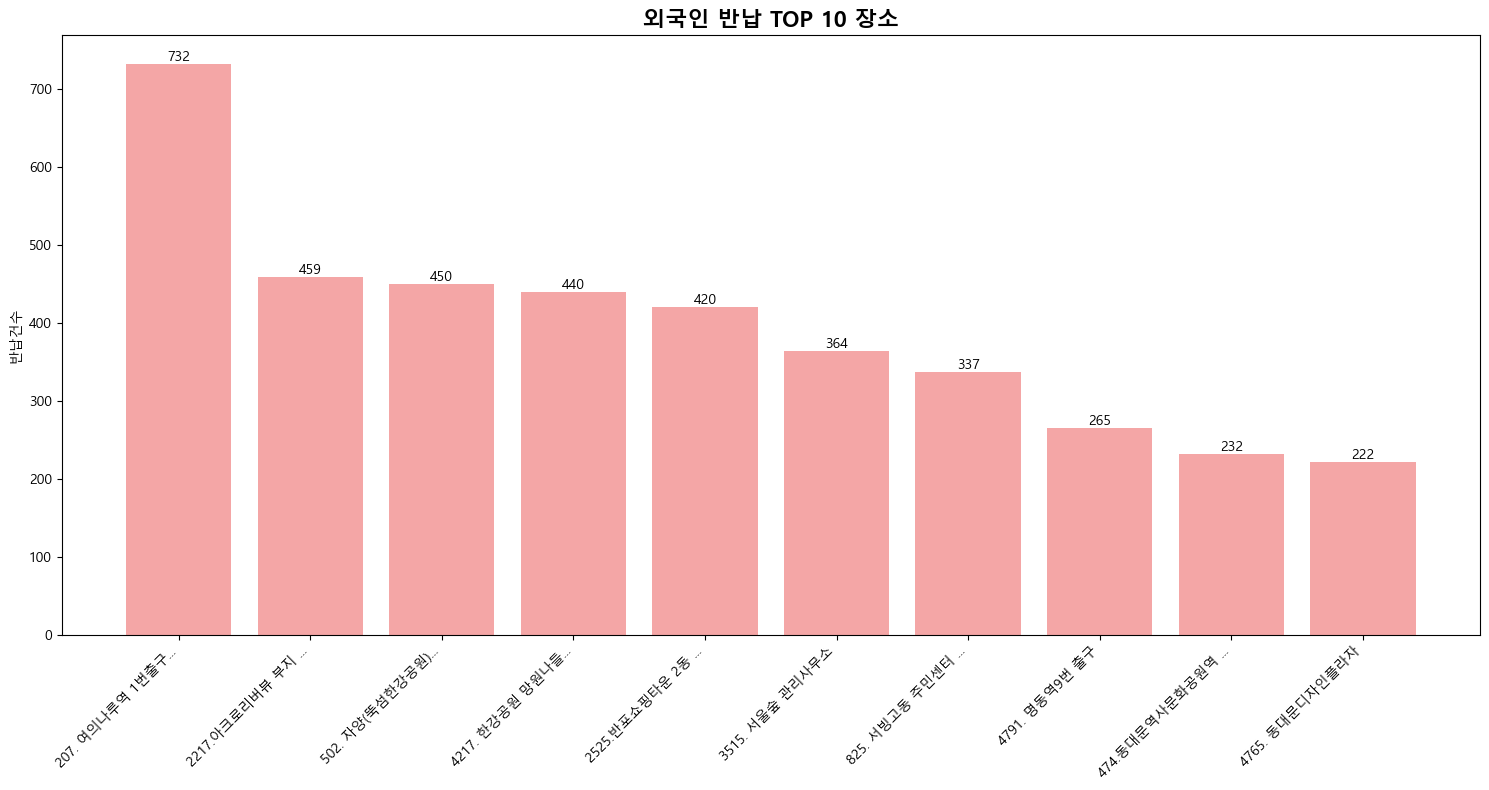

In [ ]:
# 5. 반납 TOP 10 시각화
plt.figure(figsize=(15, 8))

top_10_return = return_by_station.head(10)
bars2 = plt.bar(range(len(top_10_return)), top_10_return.values, color='lightcoral', alpha=0.7)
plt.title('외국인 반납 TOP 10 장소', fontsize=16, fontweight='bold')
plt.ylabel('반납건수')
plt.xticks(range(len(top_10_return)), [s[:15] + '...' if len(s) > 15 else s for s in top_10_return.index], 
           rotation=45, ha='right')

# 막대 위에 수치 표시
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# 6. 대여-반납 불균형 분석 (관광 패턴 파악)
total_activity['대여_반납_비율'] = total_activity['대여건수'] / (total_activity['반납건수'] + 0.1)  # 0으로 나누기 방지

# 대여가 많은 곳 (관광지 출발점일 가능성)
rental_dominant = total_activity[total_activity['대여_반납_비율'] > 1.5].sort_values('대여건수', ascending=False)
print("=== 대여가 많은 장소 (관광 출발점 가능성) ===")
for i, (station, row) in enumerate(rental_dominant.head(10).iterrows(), 1):
    print(f"{i:2d}. {station}")
    print(f"    대여: {row['대여건수']:,}, 반납: {row['반납건수']:,} (비율: {row['대여_반납_비율']:.1f})")

# 반납이 많은 곳 (관광지 도착점일 가능성)
return_dominant = total_activity[total_activity['대여_반납_비율'] < 0.7].sort_values('반납건수', ascending=False)
print("\n=== 반납이 많은 장소 (관광 도착점 가능성) ===")
for i, (station, row) in enumerate(return_dominant.head(10).iterrows(), 1):
    print(f"{i:2d}. {station}")
    print(f"    대여: {row['대여건수']:,}, 반납: {row['반납건수']:,} (비율: {row['대여_반납_비율']:.1f})")


=== 대여가 많은 장소 (관광 출발점 가능성) ===
 1. 1210. 롯데월드타워(잠실역2번출구 쪽)
    대여: 182.0, 반납: 118.0 (비율: 1.5)
 2. 4244. 당인리발전소 공원 앞
    대여: 172.0, 반납: 101.0 (비율: 1.7)
 3. 3559.성동구민종합체육센터 앞
    대여: 163.0, 반납: 102.0 (비율: 1.6)
 4. 215. 여의도고교 앞
    대여: 127.0, 반납: 82.0 (비율: 1.5)
 5. 4713. 현대 뜨레비앙 아파트 앞
    대여: 113.0, 반납: 68.0 (비율: 1.7)
 6. 387. 훈련원공원주차장 앞
    대여: 99.0, 반납: 59.0 (비율: 1.7)
 7. 433. 을지로입구역 2번출구
    대여: 93.0, 반납: 58.0 (비율: 1.6)
 8. 205. 산업은행 앞
    대여: 90.0, 반납: 42.0 (비율: 2.1)
 9. 6058. 서울도시건축전시관 옆
    대여: 80.0, 반납: 45.0 (비율: 1.8)
10. 107. 신한은행 서교동지점
    대여: 72.0, 반납: 46.0 (비율: 1.6)

=== 반납이 많은 장소 (관광 도착점 가능성) ===
 1. 2217.아크로리버뷰 부지 앞
    대여: 268.0, 반납: 459.0 (비율: 0.6)
 2. 2525.반포쇼핑타운 2동 앞
    대여: 251.0, 반납: 420.0 (비율: 0.6)
 3. 4791. 명동역9번 출구
    대여: 134.0, 반납: 265.0 (비율: 0.5)
 4. 272. 당산육갑문
    대여: 126.0, 반납: 194.0 (비율: 0.6)
 5. 106. 합정역 7번출구 앞
    대여: 120.0, 반납: 191.0 (비율: 0.6)
 6. 3627. 압구정나들목
    대여: 98.0, 반납: 144.0 (비율: 0.7)
 7. 147. 마포역 4번출구 뒤
    대여: 93.0, 반납: 140.0 (비율: 0.7)
 8. 837. 한남

In [ ]:
# 7. 종합 분석 결과 요약
print("=" * 60)
print("외국인 따릉이 이용 장소 분석 결과 요약")
print("=" * 60)
print(f"분석 기간: {df['일시'].min().strftime('%Y-%m-%d')} ~ {df['일시'].max().strftime('%Y-%m-%d')}")
print(f"총 대여소 수: {len(total_activity)}개")
print(f"전체 대여건수: {rental_by_station.sum():,}건")
print(f"전체 반납건수: {return_by_station.sum():,}건")

print("\n📍 가장 인기있는 대여 장소 TOP 3:")
for i, (station, count) in enumerate(rental_by_station.head(3).items(), 1):
    print(f"  {i}. {station} ({count:,}건)")

print("\n📍 가장 인기있는 반납 장소 TOP 3:")
for i, (station, count) in enumerate(return_by_station.head(3).items(), 1):
    print(f"  {i}. {station} ({count:,}건)")

print("\n📍 전체적으로 가장 활발한 이용 장소 TOP 3:")
for i, (station, row) in enumerate(total_activity.head(3).iterrows(), 1):
    print(f"  {i}. {station} (총 {row['총_이용건수']:,}건)")


외국인 따릉이 이용 장소 분석 결과 요약
분석 기간: 2024-07-01 ~ 2024-12-31
총 대여소 수: 2102개
전체 대여건수: 31,776건
전체 반납건수: 31,265건

📍 가장 인기있는 대여 장소 TOP 3:
  1. 207. 여의나루역 1번출구 앞 (854건)
  2. 4217. 한강공원 망원나들목 (516건)
  3. 3515. 서울숲 관리사무소 (454건)

📍 가장 인기있는 반납 장소 TOP 3:
  1. 207. 여의나루역 1번출구 앞 (732건)
  2. 2217.아크로리버뷰 부지 앞 (459건)
  3. 502. 자양(뚝섬한강공원)역 1번출구 앞 (450건)

📍 전체적으로 가장 활발한 이용 장소 TOP 3:
  1. 207. 여의나루역 1번출구 앞 (총 1,586.0건)
  2. 4217. 한강공원 망원나들목 (총 956.0건)
  3. 502. 자양(뚝섬한강공원)역 1번출구 앞 (총 852.0건)
